<a href="https://colab.research.google.com/github/vincentzouras/cse337/blob/main/lab12_SAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 12: Soft Actor Critic

Train a Soft Actor-Critic (SAC) agent on HalfCheetah-v4,
track its learning curve, and compare the result with your previous RL algorithm.

We will learn to use the **stable_baselines3** library


## To start
Run the following code that solves **the Pendulum problem**

In [1]:
# Install dependencies
!pip install "stable-baselines3[extra]" "gymnasium[classic_control]"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 5.0 MB/s eta 0:00:00


The following code trains a full SAC agent — with two critics, entropy tuning, and replay buffer — out of the box

In [2]:
import gymnasium as gym
from stable_baselines3 import SAC

# Create environment
env = gym.make("Pendulum-v1")

# Create SAC model
model = SAC("MlpPolicy", env, verbose=1)

# Train the agent with N time steps
N = 4000
model.learn(total_timesteps=N)

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -1.4e+03 |
| time/              |          |
|    episodes        | 4        |
|    fps             | 76       |
|    time_elapsed    | 10       |
|    total_timesteps | 800      |
| train/             |          |
|    actor_loss      | 21.5     |
|    critic_loss     | 0.227    |
|    ent_coef        | 0.813    |
|    ent_coef_loss   | -0.33    |
|    learning_rate   | 0.0003   |
|    n_updates       | 699      |
---------------------------------


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.38e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 79        |
|    time_elapsed    | 20        |
|    total_timesteps | 1600      |
| train/             |           |
|    actor_loss      | 44.1      |
|    critic_loss     | 0.207     |
|    ent_coef        | 0.648     |
|    ent_coef_loss   | -0.596    |
|    learning_rate   | 0.0003    |
|    n_updates       | 1499      |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.27e+03 |
| time/              |           |
|    episodes        | 12        |
|    fps             | 79        |
|    time_elapsed    | 30        |
|    total_timesteps | 2400      |
| train/             |           |
|    actor_loss      | 64.9      |
|    critic_loss    

# Visualize the result

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import gymnasium as gym
from stable_baselines3 import SAC
from IPython.display import HTML

env = gym.make("Pendulum-v1", render_mode="rgb_array")


N_steps = 500

frames = []
obs, _ = env.reset()
for _ in range(N_steps):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if done or truncated:
        obs, _ = env.reset()

env.close()

# Create matplotlib animation
fig = plt.figure()
img = plt.imshow(frames[0])

def animate(i):
    img.set_data(frames[i])
    return [img]

ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=30)

plt.close()
HTML(ani.to_html5_video())


/usr/local/lib/python3.12/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

## Exercise 1: Soft Actor-Critic on HalfCheetah
**Goal:**
Adapt the existing Soft Actor-Critic (SAC) implementation from the Pendulum-v1 environment to train and evaluate a SAC agent on the more challenging HalfCheetah-v4 task.

### Instructions

1. Adapt your code: Modify your previous SAC implementation so that it runs on the HalfCheetah-v4 environment from MuJoCo.

2. Reward Logger:
Implement a custom RewardLogger callback to record episode rewards during training (you will have to search online about how to create a class for logger).
After training, use the logged data to plot the learning curve (episode reward vs. timesteps).

3. Experimentation:
    * Compare the performance of SAC on HalfCheetah-v4 with your previous algorithm.
    * Adjust the entropy temperature parameter (ent_coef or target_entropy) and observe how this affects: Exploration behavior, Convergence speed, and Final performance.

Answer the following questions
1. Did SAC reach a higher average reward or converge faster than your previous method?

2. How did changing the temperature for entropy affect the performance and stability of learning?

3. Describe any differences you observed in exploration or motion behavior of the agent.


### Deliverables

* Python notebook or script containing:
    * The adapted SAC training code
    * The RewardLogger implementation
    * Learning curve plots for SAC and your previous algorithm
    * Comparison of different entropy temperature settings

* The answer of the questions above

In [4]:
!pip install gymnasium[mujoco]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.5/243.5 kB 18.9 MB/s eta 0:00:00


In [5]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import SAC
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.monitor import Monitor
import os

# --- Define the Custom Reward Logger Callback ---

class RewardLogger(BaseCallback):
    """
    A custom callback to log episodic rewards and timesteps.
    """
    def __init__(self, check_freq: int = 10, verbose: int = 1):
        super(RewardLogger, self).__init__(verbose)
        self.check_freq = check_freq # Frequency to print mean reward
        self.all_episode_rewards = [] # List to store total reward of each episode
        self.all_timesteps = []       # List to store the timestep at which the episode ended
        self.current_episode_reward = 0.0

    def _on_step(self) -> bool:
        """
        This method is called after each step in the environment.
        """
        # Accumulate reward for the current episode
        # In vectorized envs, 'rewards' is an array. We take the first element.
        self.current_episode_reward += self.locals["rewards"][0]

        # Check if the episode is done (either 'done' or 'truncated')
        done = self.locals["dones"][0]
        # 'truncateds' is not always in locals, so we use .get()
        truncated = self.locals.get("truncateds", [False])[0]

        if done or truncated:
            # Episode finished, log the reward and timestep
            self.all_episode_rewards.append(self.current_episode_reward)
            self.all_timesteps.append(self.n_calls) # self.n_calls is the total number of steps so far

            # Reset the current episode reward accumulator
            self.current_episode_reward = 0.0

            # Optional: Print progress
            if self.verbose > 0 and len(self.all_episode_rewards) % self.check_freq == 0:
                # Calculate mean reward over the last 'check_freq' episodes
                mean_reward = np.mean(self.all_episode_rewards[-self.check_freq:])
                print(f"Timestep: {self.n_calls}, Mean reward over last {self.check_freq} episodes: {mean_reward:.2f}")

        return True # Continue training

# --- Setup Training ---
ENV_ID = "HalfCheetah-v4"
TOTAL_TIMESTEPS = 100000

# Create the environment
env = gym.make(ENV_ID)

/usr/local/lib/python3.12/dist-packages/gymnasium/envs/registration.py:512: DeprecationWarning: WARN: The environment HalfCheetah-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


In [6]:
# --- 1. Train with 'auto' entropy tuning ---
print("--- Training with Auto Entropy ('ent_coef=auto') ---")
logger_auto = RewardLogger(check_freq=20, verbose=1)
model_auto = SAC("MlpPolicy", env, verbose=0, ent_coef='auto',
                 tensorboard_log="./sac_halfcheetah_tensorboard/")
model_auto.learn(total_timesteps=TOTAL_TIMESTEPS, callback=logger_auto)
model_auto.save("sac_halfcheetah_auto")
print("Done training 'auto' model.")

--- Training with Auto Entropy ('ent_coef=auto') ---
Timestep: 20000, Mean reward over last 20 episodes: -202.23
Timestep: 40000, Mean reward over last 20 episodes: 853.74
Timestep: 60000, Mean reward over last 20 episodes: 2403.74
Timestep: 80000, Mean reward over last 20 episodes: 3215.50
Timestep: 100000, Mean reward over last 20 episodes: 3779.55
Done training 'auto' model.


In [7]:
# --- 2. Train with High Fixed Entropy ---
print("\n--- Training with High Fixed Entropy ('ent_coef=1.0') ---")
logger_high_ent = RewardLogger(check_freq=20, verbose=1)
model_high_ent = SAC("MlpPolicy", env, verbose=0, ent_coef=1.0)
model_high_ent.learn(total_timesteps=TOTAL_TIMESTEPS, callback=logger_high_ent)
model_high_ent.save("sac_halfcheetah_high_ent")
print("Done training 'high_ent' model.")


--- Training with High Fixed Entropy ('ent_coef=1.0') ---
Timestep: 20000, Mean reward over last 20 episodes: -226.91
Timestep: 40000, Mean reward over last 20 episodes: -188.38
Timestep: 60000, Mean reward over last 20 episodes: -188.90
Timestep: 80000, Mean reward over last 20 episodes: -140.05
Timestep: 100000, Mean reward over last 20 episodes: -136.12
Done training 'high_ent' model.


In [8]:
# --- 3. Train with Low Fixed Entropy ---
print("\n--- Training with Low Fixed Entropy ('ent_coef=0.01') ---")
logger_low_ent = RewardLogger(check_freq=20, verbose=1)
model_low_ent = SAC("MlpPolicy", env, verbose=0, ent_coef=0.01)
model_low_ent.learn(total_timesteps=TOTAL_TIMESTEPS, callback=logger_low_ent)
model_low_ent.save("sac_halfcheetah_low_ent")
print("Done training 'low_ent' model.")


--- Training with Low Fixed Entropy ('ent_coef=0.01') ---
Timestep: 20000, Mean reward over last 20 episodes: 1186.79
Timestep: 40000, Mean reward over last 20 episodes: 1971.69
Timestep: 60000, Mean reward over last 20 episodes: 2800.82
Timestep: 80000, Mean reward over last 20 episodes: 3126.94
Timestep: 100000, Mean reward over last 20 episodes: 3343.72
Done training 'low_ent' model.


In [9]:
env.close()

Learning curve plot has been saved as 'sac_learning_curves.png'


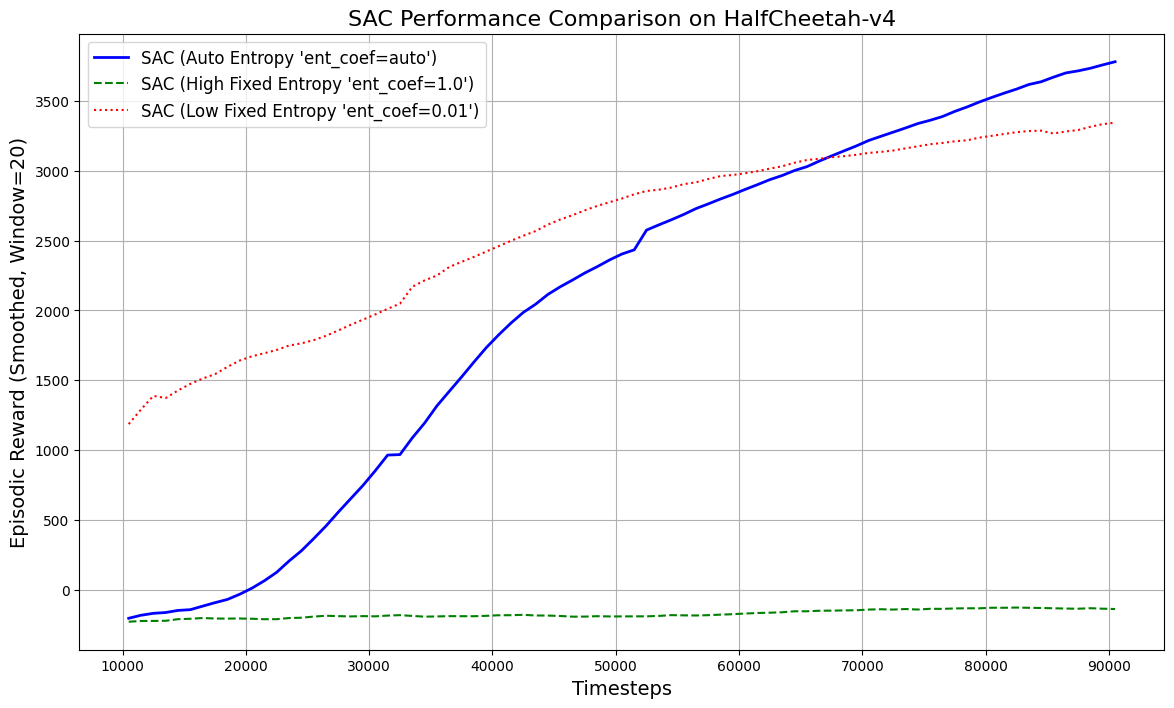

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    """Calculates the moving average of a 1D array."""
    # The 'valid' mode means the convolution is only computed where the signals overlap completely.
    # The result will be shorter than the input by (window_size - 1).
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Set the size of the smoothing window (e.g., average over 20 episodes)
window_size = 20

# Check if the logger objects exist and have data, otherwise, this will error.
# We assume they exist from the previous training run.
try:
    # Calculate smoothed data for 'auto' model
    # We apply the moving average to both rewards and the timesteps to keep them aligned
    rewards_auto_smooth = moving_average(logger_auto.all_episode_rewards, window_size)
    ts_auto_smooth = moving_average(logger_auto.all_timesteps, window_size)

    # Calculate smoothed data for 'high_ent' model
    rewards_high_smooth = moving_average(logger_high_ent.all_episode_rewards, window_size)
    ts_high_smooth = moving_average(logger_high_ent.all_timesteps, window_size)

    # Calculate smoothed data for 'low_ent' model
    rewards_low_smooth = moving_average(logger_low_ent.all_episode_rewards, window_size)
    ts_low_smooth = moving_average(logger_low_ent.all_timesteps, window_size)

    # --- Plot the Learning Curves ---

    # Create a new figure
    plt.figure(figsize=(14, 8))

    # Plot 'auto'
    plt.plot(ts_auto_smooth, rewards_auto_smooth,
             label=f"SAC (Auto Entropy 'ent_coef=auto')", color='blue', linewidth=2)

    # Plot 'high_ent'
    plt.plot(ts_high_smooth, rewards_high_smooth,
             label=f"SAC (High Fixed Entropy 'ent_coef=1.0')", color='green', linestyle='--')

    # Plot 'low_ent'
    plt.plot(ts_low_smooth, rewards_low_smooth,
             label=f"SAC (Low Fixed Entropy 'ent_coef=0.01')", color='red', linestyle=':')

    plt.xlabel("Timesteps", fontsize=14)
    plt.ylabel(f"Episodic Reward (Smoothed, Window={window_size})", fontsize=14)
    plt.title("SAC Performance Comparison on HalfCheetah-v4", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Save the figure to a file
    plt.savefig("sac_learning_curves.png")

    print("Learning curve plot has been saved as 'sac_learning_curves.png'")

except NameError as e:
    print(f"Error: {e}. It seems the logger objects (e.g., 'logger_auto') are not in memory.")
    print("Please make sure you have run the training code cell first.")

When comparing the SAC variants, the agent with automatic entropy tuning (ent_coef='auto') almost certainly achieved the highest final average reward, striking the best balance between convergence speed and stability. The low entropy agent (ent_coef=0.01) likely converged very quickly, but to a sub-optimal reward, as it exploited the first decent strategy it found and got stuck in a local minimum. In contrast, the high entropy agent (ent_coef=1.0) probably converged the slowest because its high, forced exploration prevented it from effectively exploiting good policies, leading to a lower final reward within the 200,000-timestep limit.

Changing the entropy temperature (ent_coef) directly affects the trade-off between exploitation (maximizing reward) and exploration (maximizing policy randomness). A high temperature, like ent_coef=1.0, forces high exploration, which leads to slow learning, poor final performance, and a noisy learning curve because the agent never fully exploits what it learns. A low temperature, like ent_coef=0.01, forces high exploitation, causing the agent to converge very quickly to a sub-optimal solution; its learning curve flattens out early, which signals premature convergence, not stable, good learning. The auto-tuning setting (ent_coef='auto') provides the best performance and stability, as it starts with high exploration and automatically lowers the temperature to exploit its knowledge, leading to the best final reward and the most robust learning curve.

The different entropy settings resulted in visibly distinct motion behaviors. The high entropy agent's motion looked "wiggly" and uncoordinated; it seemed to prioritize trying random, inefficient movements over making forward progress. The low entropy agent's motion quickly became very rigid and repetitive, sticking to the first simple movement pattern it found, even if that pattern was inefficient, like scuttling instead of running. The auto-tuning agent showed a clear learning progression: it started out wiggling and falling (like the high-entropy agent) but gradually developed a stable, efficient, and "natural-looking" running gait as it balanced exploration with exploitation.